<a href="https://colab.research.google.com/github/mehrotrasan16/Keras-Deep-Learning/blob/02-Q2-HParamsFinal/A2_Q2_FashionMNISTHandwritten_Hparams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Imports](#scrollTo=Hjlzw-dmn0dv)

>[Data Preprocessing](#scrollTo=X8d-bgUMn3ny)

>[HandWritten Model](#scrollTo=puk-2jSmn_87)

>[Loading AutoKeras Model](#scrollTo=hgi1B6uxoFEK)

>[HParams Tuning](#scrollTo=1owSJxzqoTr9)

>[Optimizer Tuning](#scrollTo=NN07Woq0oWqr)

>[Activation function Tuning](#scrollTo=kJqyVJW9nyJL)

>>>[3 - layer Handwritten Network - 27 Combinations](#scrollTo=OanuAAlbUZ0I)

>>>[4 - Layer - Modified Network - 81 Combinations](#scrollTo=uBW9LIqMtYBb)

>[Number of Units Training](#scrollTo=Ehx8dDrjAjcy)

>[Re-Do Handwritten model with finetuned parameters](#scrollTo=lcv3K_BXEZcU)

>[END](#scrollTo=jz0Y0clqAEry)



In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import models,layers

# Data Preprocessing

In [22]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# HandWritten Model

In [23]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL

model = models.Sequential()
model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Dropout(0.50))
model.add(layers.Dense(10))


In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=15, 
                    validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4226 - accuracy: 0.8483 - val_loss: 0.3023 - val_accuracy: 0.8941
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2766 - accuracy: 0.8978 - val_loss: 0.2679 - val_accuracy: 0.9020
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2331 - accuracy: 0.9145 - val_loss: 0.2517 - val_accuracy: 0.9090
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2035 - accuracy: 0.9255 - val_loss: 0.2470 - val_accuracy: 0.9105
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1793 - accuracy: 0.9330 - val_loss: 0.2303 - val_accuracy: 0.9200
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1587 - accuracy: 0.9402 - val_loss: 0.2494 - val_accuracy: 0.9141
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1402 - accuracy: 0.9472 - val_loss: 0.2340 - val_accuracy:

313/313 - 1s - loss: 0.3238 - accuracy: 0.9271


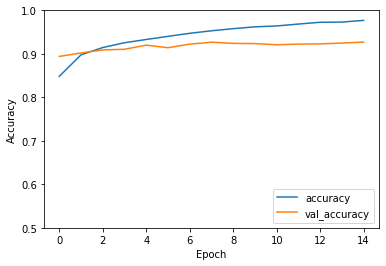

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

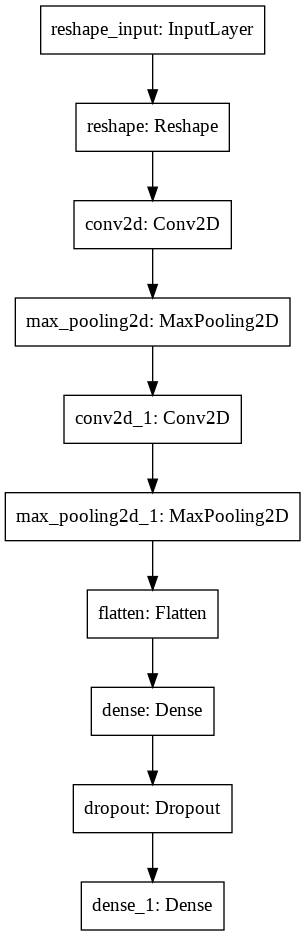

In [26]:
keras.utils.plot_model(model)

# Loading AutoKeras Model

In [27]:
from keras.models import load_model
# returns a compiled model
# identical to the previous one
model = load_model('/content/drive/My Drive/Colab Notebooks/AutoKerasFashionMNIST.h5')
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
normalization (Normalization)   (None, 28, 28, 1)    3           input_1[0][0]                    
__________________________________________________________________________________________________
random_translation (RandomTrans (None, 28, 28, 1)    0           normalization[0][0]              
__________________________________________________________________________________________________
random_flip (RandomFlip)        (None, 28, 28, 1)    0           random_translation[0][0]         
_______________________________________________________________________________________

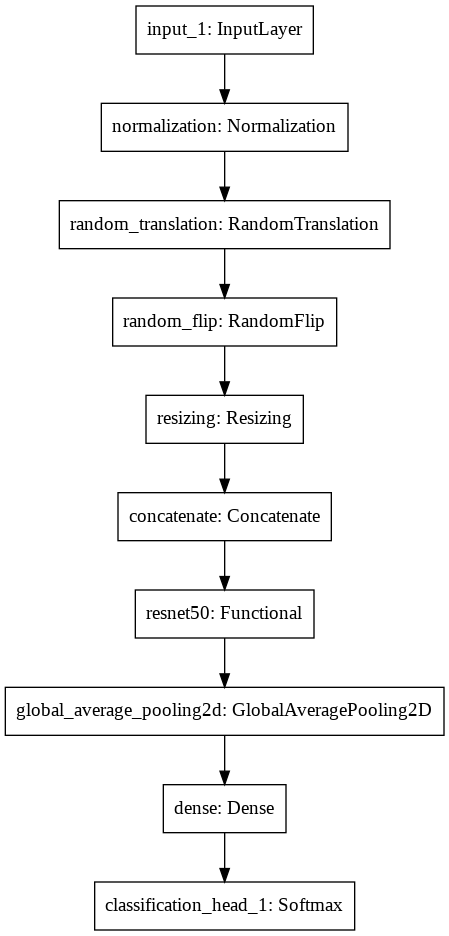

In [28]:
keras.utils.plot_model(model)

# HParams Tuning

In [29]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [30]:
from tensorboard.plugins.hparams import api as hp

In [31]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

# Optimizer Tuning

In [32]:
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['rmsprop','sgd','adam', 'nadam','adadelta','adagrad','adamax','ftrl']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [33]:
def train_test_model(hparams):
  #model = load_model('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/AutoKerasFashionMNIST.h5')
    model = models.Sequential()
    model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
    model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(10))

    model.compile(
        optimizer=hparams[HP_OPTIMIZER],
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'],
    )
    model.fit(x_train, y_train, epochs=15) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(x_test, y_test)
    return accuracy

In [34]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
  return accuracy

In [35]:
session_num = 0
algodict = {}
for optimizer in HP_OPTIMIZER.domain.values:
    hparams = {
        HP_OPTIMIZER: optimizer,
    }
    run_name = "run-%d" % session_num
    print('--- Starting trial: %s' % run_name)
    print({h.name: hparams[h] for h in hparams})
    algodict[optimizer] = run('logs/hparam_opt_tuning/' + run_name, hparams)
    session_num += 1


--- Starting trial: run-0
{'optimizer': 'adadelta'}
Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1896 - accuracy: 0.2725
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9125 - accuracy: 0.4915
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5769 - accuracy: 0.5528
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3030 - accuracy: 0.5834
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1367 - accuracy: 0.6085
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0330 - accuracy: 0.6344
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9633 - accuracy: 0.6567
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9148 - accuracy: 0.6760
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8724 - accuracy: 0.6916
Epoch 10/15
1875/1875 [=======

In [36]:
algodict

{'adadelta': 0.7753000259399414,
 'adagrad': 0.8468999862670898,
 'adam': 0.9247000217437744,
 'adamax': 0.9221000075340271,
 'ftrl': 0.10000000149011612,
 'nadam': 0.9200999736785889,
 'rmsprop': 0.8895999789237976,
 'sgd': 0.8974000215530396}

In [37]:
print(sorted(algodict.items(),key=lambda x: (x[1],x[0])))
plotvar = sorted(algodict.items(),key=lambda x: (x[1],x[0]))

[('ftrl', 0.10000000149011612), ('adadelta', 0.7753000259399414), ('adagrad', 0.8468999862670898), ('rmsprop', 0.8895999789237976), ('sgd', 0.8974000215530396), ('nadam', 0.9200999736785889), ('adamax', 0.9221000075340271), ('adam', 0.9247000217437744)]


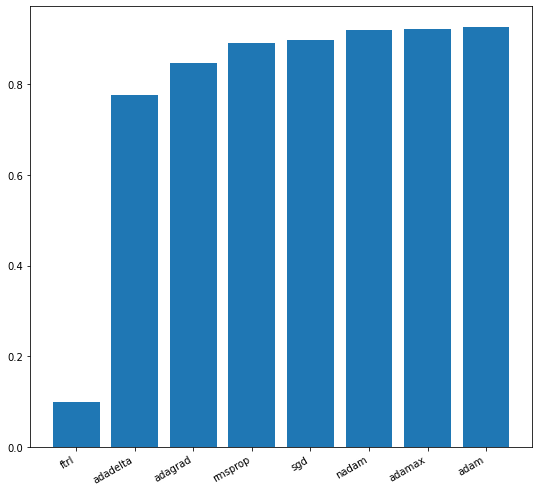

In [38]:
plt.bar([x[0] for x in plotvar],[x[1] for x in plotvar])
f = plt.gcf()
f.set_size_inches(9,9)
f.autofmt_xdate()

# Activation function Tuning

### 3 - layer Handwritten Network - 27 Combinations

In [39]:
HP_ACTIVATIONS1 = hp.HParam('activation1',hp.Discrete(['relu','selu','elu']))
HP_ACTIVATIONS2 = hp.HParam('activation2',hp.Discrete(['relu','selu','elu']))
HP_ACTIVATIONS3 = hp.HParam('activation3',hp.Discrete(['relu','selu','elu']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning_acts').as_default():
  hp.hparams_config(
    hparams=[HP_ACTIVATIONS1,HP_ACTIVATIONS2,HP_ACTIVATIONS3],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [40]:
def train_test_model2(hparams):
    model2 = models.Sequential()
    model2.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
    model2.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation=hparams[HP_ACTIVATIONS1], input_shape=(28,28)))
    model2.add(layers.MaxPool2D(pool_size=(2,2)))
    model2.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation=hparams[HP_ACTIVATIONS2]))
    model2.add(layers.MaxPool2D(pool_size=(2,2)))
    model2.add(layers.Flatten())
    model2.add(layers.Dense(512, activation=hparams[HP_ACTIVATIONS3]))
    model2.add(layers.Dropout(0.50))
    model2.add(layers.Dense(10))
    model2.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
    )
    model2.fit(x_train, y_train, epochs=15) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model2.evaluate(x_test, y_test)
    return accuracy

In [41]:
def run2(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model2(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
  return accuracy

In [42]:
session_num = 0
actdict = {}
for act1 in HP_ACTIVATIONS1.domain.values:
    for act2 in HP_ACTIVATIONS2.domain.values:
        for act3 in HP_ACTIVATIONS3.domain.values:
            hparams = {
                HP_ACTIVATIONS1: act1,
                HP_ACTIVATIONS2: act2,
                HP_ACTIVATIONS3: act3,
            }
            run_name = "run-%d" % session_num
            print('--- Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            actdict[(act1,act2,act3)] = run2('logs/hparam_tuning_acts/' + run_name, hparams)
            session_num += 1


--- Starting trial: run-0
{'activation1': 'elu', 'activation2': 'elu', 'activation3': 'elu'}
Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9126 - accuracy: 0.3884
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3057 - accuracy: 0.2604
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.2080
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.2079
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3024 - accuracy: 0.2060
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3032 - accuracy: 0.2087
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3024 - accuracy: 0.2079
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3043 - accuracy: 0.1952
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3038 - accura

In [43]:
actdict

{('elu', 'elu', 'elu'): 0.23849999904632568,
 ('elu', 'elu', 'relu'): 0.13950000703334808,
 ('elu', 'elu', 'selu'): 0.11240000277757645,
 ('elu', 'relu', 'elu'): 0.10000000149011612,
 ('elu', 'relu', 'relu'): 0.10000000149011612,
 ('elu', 'relu', 'selu'): 0.10000000149011612,
 ('elu', 'selu', 'elu'): 0.10000000149011612,
 ('elu', 'selu', 'relu'): 0.10050000250339508,
 ('elu', 'selu', 'selu'): 0.10000000149011612,
 ('relu', 'elu', 'elu'): 0.16519999504089355,
 ('relu', 'elu', 'relu'): 0.10000000149011612,
 ('relu', 'elu', 'selu'): 0.10000000149011612,
 ('relu', 'relu', 'elu'): 0.09939999878406525,
 ('relu', 'relu', 'relu'): 0.10000000149011612,
 ('relu', 'relu', 'selu'): 0.10029999911785126,
 ('relu', 'selu', 'elu'): 0.10000000149011612,
 ('relu', 'selu', 'relu'): 0.10000000149011612,
 ('relu', 'selu', 'selu'): 0.10000000149011612,
 ('selu', 'elu', 'elu'): 0.1850000023841858,
 ('selu', 'elu', 'relu'): 0.10000000149011612,
 ('selu', 'elu', 'selu'): 0.10000000149011612,
 ('selu', 'relu', 

In [44]:
print(sorted(actdict.items(),key=lambda x: (x[1],x[0])))

[(('relu', 'relu', 'elu'), 0.09939999878406525), (('elu', 'relu', 'elu'), 0.10000000149011612), (('elu', 'relu', 'relu'), 0.10000000149011612), (('elu', 'relu', 'selu'), 0.10000000149011612), (('elu', 'selu', 'elu'), 0.10000000149011612), (('elu', 'selu', 'selu'), 0.10000000149011612), (('relu', 'elu', 'relu'), 0.10000000149011612), (('relu', 'elu', 'selu'), 0.10000000149011612), (('relu', 'relu', 'relu'), 0.10000000149011612), (('relu', 'selu', 'elu'), 0.10000000149011612), (('relu', 'selu', 'relu'), 0.10000000149011612), (('relu', 'selu', 'selu'), 0.10000000149011612), (('selu', 'elu', 'relu'), 0.10000000149011612), (('selu', 'elu', 'selu'), 0.10000000149011612), (('selu', 'relu', 'selu'), 0.10000000149011612), (('selu', 'selu', 'selu'), 0.10000000149011612), (('relu', 'relu', 'selu'), 0.10029999911785126), (('elu', 'selu', 'relu'), 0.10050000250339508), (('selu', 'selu', 'relu'), 0.10719999670982361), (('elu', 'elu', 'selu'), 0.11240000277757645), (('elu', 'elu', 'relu'), 0.13950000

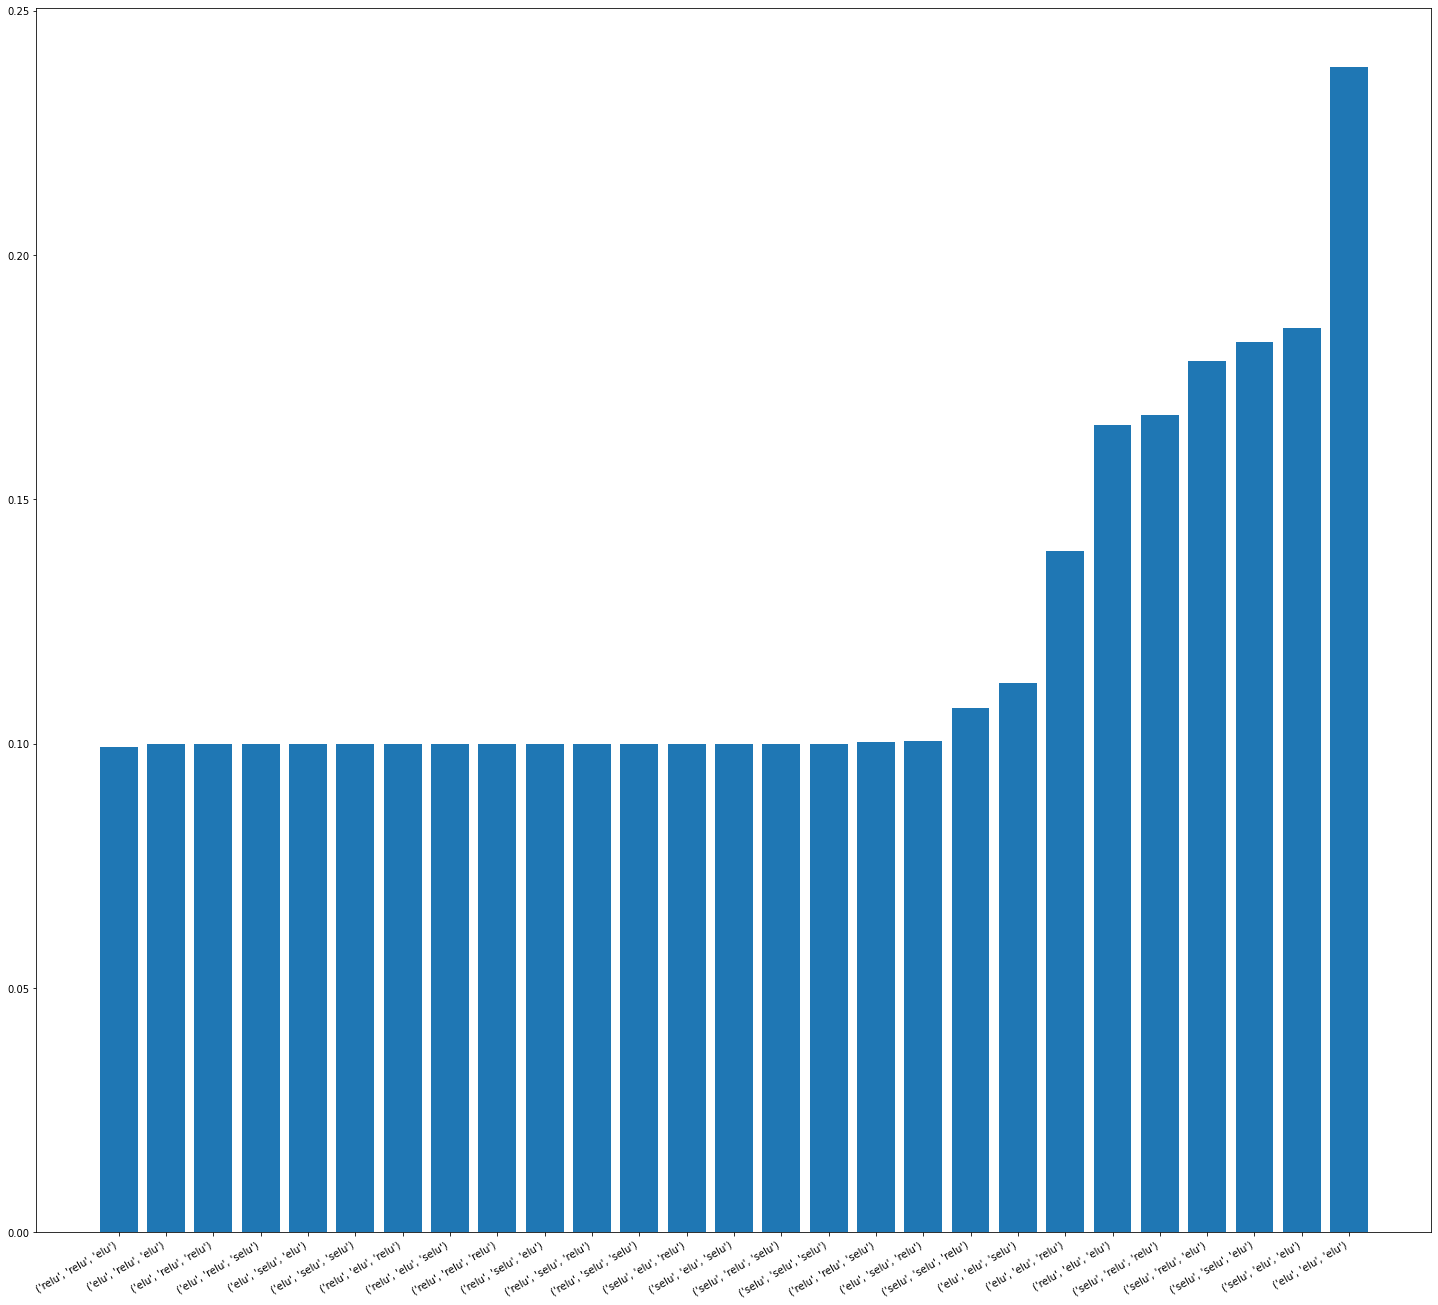

In [45]:
plotvar2 = sorted(actdict.items(),key=lambda x: (x[1],x[0]))
plt.bar([str(x[0]) for x in plotvar2],[x[1] for x in plotvar2])
f = plt.gcf()
f.set_size_inches(25,25)
f.autofmt_xdate()

### 4 - Layer - Modified Network - 81 Combinations 

In [ ]:
# HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
# HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_ACTIVATIONS1 = hp.HParam('activation1',hp.Discrete(['relu','selu','elu']))
HP_ACTIVATIONS2 = hp.HParam('activation2',hp.Discrete(['relu','selu','elu']))
HP_ACTIVATIONS3 = hp.HParam('activation3',hp.Discrete(['relu','selu','elu']))
HP_ACTIVATIONS4 = hp.HParam('activation4',hp.Discrete(['relu','selu','elu']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning_acts').as_default():
  hp.hparams_config(
    hparams=[HP_ACTIVATIONS1,HP_ACTIVATIONS2,HP_ACTIVATIONS3,HP_ACTIVATIONS4],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
def train_test_model(hparams):
  #model = load_model('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/AutoKerasFashionMNIST.h5')
    model = models.Sequential()
    model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
    model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation=hparams[HP_ACTIVATIONS1], input_shape=(28,28)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation=hparams[HP_ACTIVATIONS2]))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation=hparams[HP_ACTIVATIONS3]))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(512, activation=hparams[HP_ACTIVATIONS4]))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(10))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
    )
    model.fit(x_train, y_train, epochs=15) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(x_test, y_test)
    return accuracy

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
  return accuracy

In [ ]:
session_num = 0
actdict_4layer = {}
for act1 in HP_ACTIVATIONS1.domain.values:
    for act2 in HP_ACTIVATIONS2.domain.values:
        for act3 in HP_ACTIVATIONS3.domain.values:
            for act4 in HP_ACTIVATIONS4.domain.values:            
                hparams = {
                    HP_ACTIVATIONS1: act1,
                    HP_ACTIVATIONS2: act2,
                    HP_ACTIVATIONS3: act3,
                    HP_ACTIVATIONS4: act4
                }
                run_name = "run-%d" % session_num
                print('--- Starting trial: %s' % run_name)
                print({h.name: hparams[h] for h in hparams})
                actdict_4layer[(act1,act2,act3,act4)] = run('logs/hparam_tuning_acts/' + run_name, hparams)
                session_num += 1


--- Starting trial: run-0
{'activation1': 'elu', 'activation2': 'elu', 'activation3': 'elu', 'activation4': 'elu'}
Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3448 - accuracy: 0.1344
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.1042
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.1049
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.1028
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3030 - accuracy: 0.1044
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.1029
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 12.9098 - accuracy: 0.1004
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 9.9241 - accuracy: 0.1002
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step 

In [ ]:
 print(f"Number of Sessions: {session_num}")

Number of Sessions: 81


In [ ]:
actdict_4layer

{('elu', 'elu', 'elu', 'elu'): 0.10000000149011612,
 ('elu', 'elu', 'elu', 'relu'): 0.10000000149011612,
 ('elu', 'elu', 'elu', 'selu'): 0.10000000149011612,
 ('elu', 'elu', 'relu', 'elu'): 0.10000000149011612,
 ('elu', 'elu', 'relu', 'relu'): 0.10000000149011612,
 ('elu', 'elu', 'relu', 'selu'): 0.10000000149011612,
 ('elu', 'elu', 'selu', 'elu'): 0.10000000149011612,
 ('elu', 'elu', 'selu', 'relu'): 0.10000000149011612,
 ('elu', 'elu', 'selu', 'selu'): 0.10000000149011612,
 ('elu', 'relu', 'elu', 'elu'): 0.10000000149011612,
 ('elu', 'relu', 'elu', 'relu'): 0.10000000149011612,
 ('elu', 'relu', 'elu', 'selu'): 0.014000000432133675,
 ('elu', 'relu', 'relu', 'elu'): 0.09369999915361404,
 ('elu', 'relu', 'relu', 'relu'): 0.10000000149011612,
 ('elu', 'relu', 'relu', 'selu'): 0.10000000149011612,
 ('elu', 'relu', 'selu', 'elu'): 0.1444000005722046,
 ('elu', 'relu', 'selu', 'relu'): 0.10000000149011612,
 ('elu', 'relu', 'selu', 'selu'): 0.10000000149011612,
 ('elu', 'selu', 'elu', 'elu'):

In [ ]:
print(sorted(actdict_4layer.items(),key=lambda x: (x[1],x[0])))

[(('elu', 'relu', 'elu', 'selu'), 0.014000000432133675), (('selu', 'selu', 'selu', 'relu'), 0.06620000302791595), (('selu', 'selu', 'relu', 'selu'), 0.093299999833107), (('elu', 'relu', 'relu', 'elu'), 0.09369999915361404), (('relu', 'elu', 'elu', 'selu'), 0.09380000084638596), (('selu', 'elu', 'elu', 'selu'), 0.09870000183582306), (('elu', 'elu', 'elu', 'elu'), 0.10000000149011612), (('elu', 'elu', 'elu', 'relu'), 0.10000000149011612), (('elu', 'elu', 'elu', 'selu'), 0.10000000149011612), (('elu', 'elu', 'relu', 'elu'), 0.10000000149011612), (('elu', 'elu', 'relu', 'relu'), 0.10000000149011612), (('elu', 'elu', 'relu', 'selu'), 0.10000000149011612), (('elu', 'elu', 'selu', 'elu'), 0.10000000149011612), (('elu', 'elu', 'selu', 'relu'), 0.10000000149011612), (('elu', 'elu', 'selu', 'selu'), 0.10000000149011612), (('elu', 'relu', 'elu', 'elu'), 0.10000000149011612), (('elu', 'relu', 'elu', 'relu'), 0.10000000149011612), (('elu', 'relu', 'relu', 'relu'), 0.10000000149011612), (('elu', 're

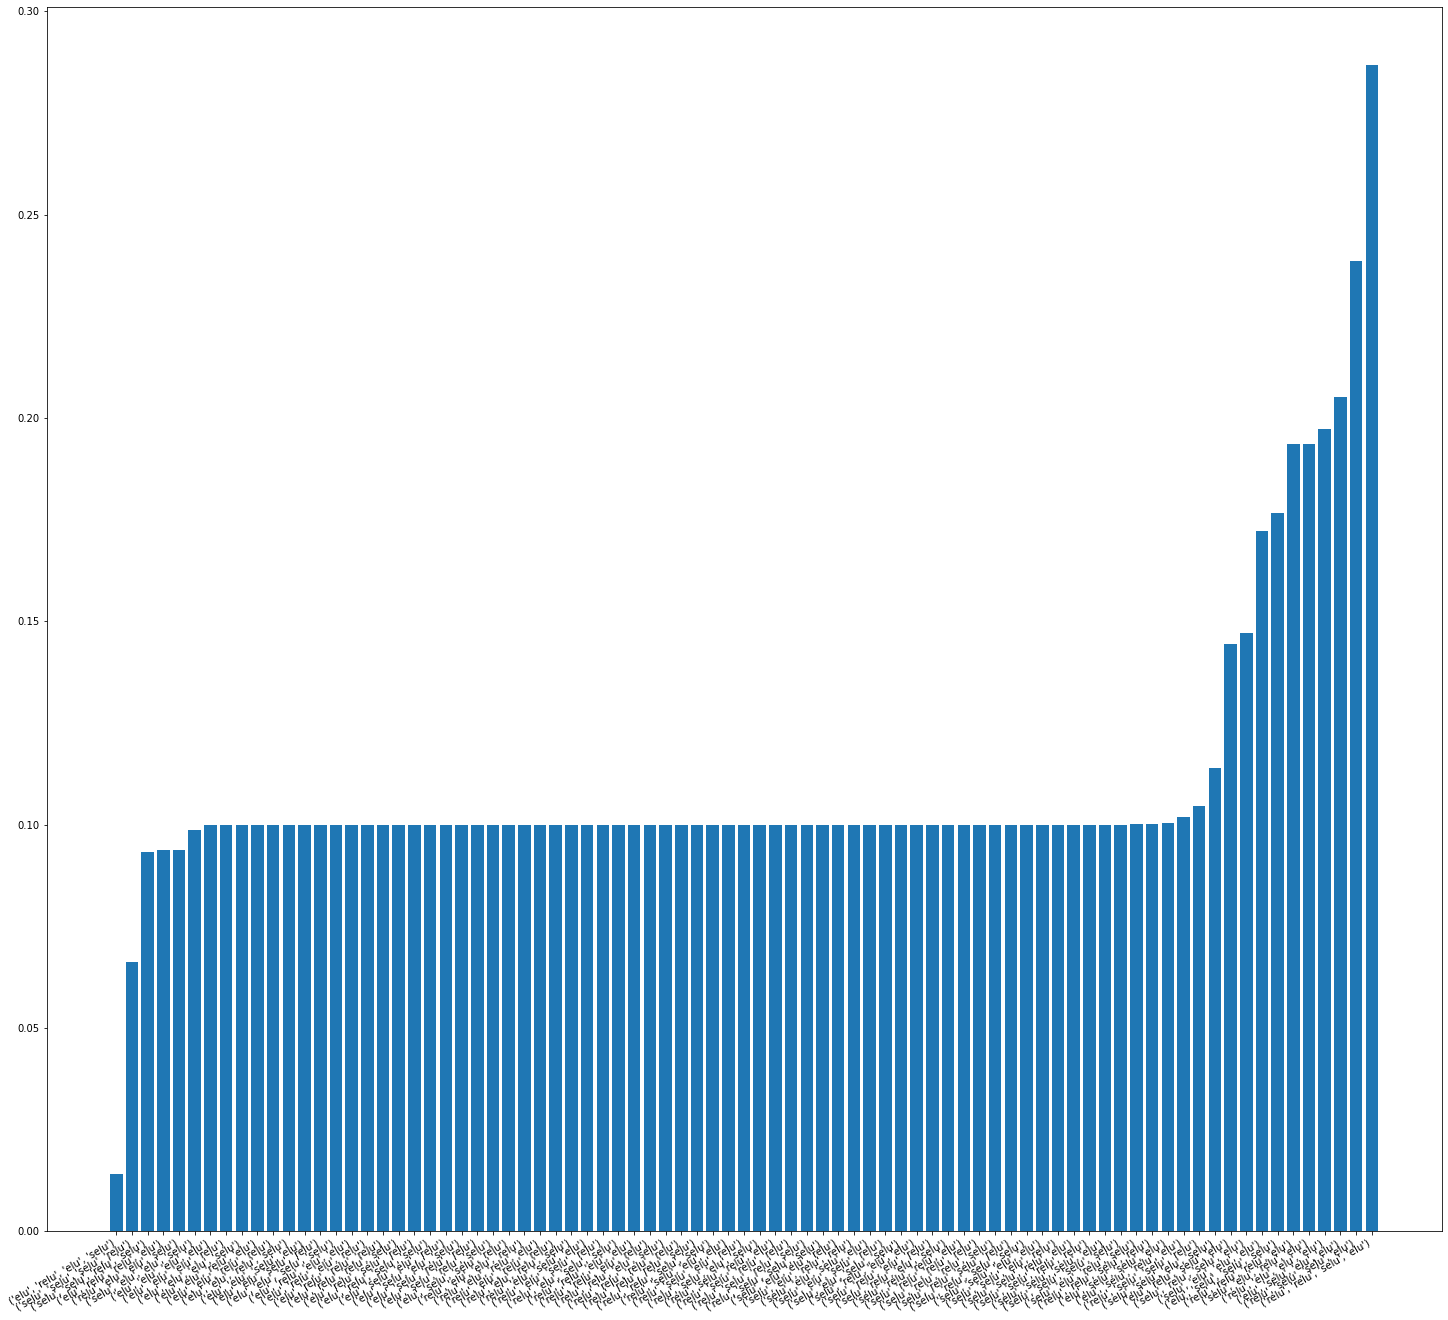

In [ ]:
plotvar2 = sorted(actdict_4layer.items(),key=lambda x: (x[1],x[0]))
plt.bar([str(x[0]) for x in plotvar2],[x[1] for x in plotvar2])
f = plt.gcf()
f.set_size_inches(25,25)
f.autofmt_xdate()

# Number of Units Training

In [50]:
HP_FILTER1 = hp.HParam('filters1', hp.Discrete([32, 64, 128]))
HP_FILTER2 = hp.HParam('filters2', hp.Discrete([32, 64, 128]))
HP_NUM_UNITS1 = hp.HParam('num_units1', hp.Discrete([256, 512, 1024]))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning_units').as_default():
  hp.hparams_config(
    hparams=[HP_FILTER1,HP_FILTER2,HP_NUM_UNITS1],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [51]:
def train_test_model3(hparams):
    model3 = models.Sequential()
    model3.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
    model3.add(layers.Conv2D(hparams[HP_FILTER1], kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28)))
    model3.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model3.add(layers.Conv2D(hparams[HP_FILTER2], kernel_size=(3,3), padding='same', activation='relu'))
    model3.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model3.add(layers.Flatten())
    model3.add(layers.Dense(hparams[HP_NUM_UNITS1], activation='relu'))
    
    model3.add(layers.Dropout(0.50))
    model3.add(layers.Dense(10))

    model3.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
    )
    model3.fit(x_train, y_train, epochs=15) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model3.evaluate(x_test, y_test)
    return accuracy

In [52]:
def run3(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model3(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
  return accuracy

In [53]:
session_num = 0
unitdict = {}
for unit1 in HP_FILTER1.domain.values:
    for unit2 in HP_FILTER2.domain.values:
        for unit3 in HP_NUM_UNITS1.domain.values:
                    hparams = {
                        HP_FILTER1: unit1,
                        HP_FILTER2: unit2,
                        HP_NUM_UNITS1: unit3,
                    }
                    run_name = "run-%d" % session_num
                    print('--- Starting trial: %s' % run_name)
                    print({h.name: hparams[h] for h in hparams})
                    unitdict[(unit1,unit2,unit3)] = run3('logs/hparam_tuning_acts/' + run_name, hparams)
                    session_num += 1


--- Starting trial: run-0
{'filters1': 32, 'filters2': 32, 'num_units1': 256}
Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3407 - accuracy: 0.1232
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3031 - accuracy: 0.1176
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3046 - accuracy: 0.1117
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3030 - accuracy: 0.0993
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.0977
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.0984
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1000
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3031 - accuracy: 0.1034
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1019
Epoc

In [54]:
print(f'Number of Sessions: {session_num}')

Number of Sessions: 27


In [55]:
unitdict

{(32, 32, 256): 0.10000000149011612,
 (32, 32, 512): 0.055799998342990875,
 (32, 32, 1024): 0.46470001339912415,
 (32, 64, 256): 0.10000000149011612,
 (32, 64, 512): 0.10000000149011612,
 (32, 64, 1024): 0.10100000351667404,
 (32, 128, 256): 0.10000000149011612,
 (32, 128, 512): 0.10000000149011612,
 (32, 128, 1024): 0.10000000149011612,
 (64, 32, 256): 0.10000000149011612,
 (64, 32, 512): 0.10000000149011612,
 (64, 32, 1024): 0.0803999975323677,
 (64, 64, 256): 0.10000000149011612,
 (64, 64, 512): 0.16760000586509705,
 (64, 64, 1024): 0.09929999709129333,
 (64, 128, 256): 0.10000000149011612,
 (64, 128, 512): 0.10000000149011612,
 (64, 128, 1024): 0.10000000149011612,
 (128, 32, 256): 0.10000000149011612,
 (128, 32, 512): 0.10000000149011612,
 (128, 32, 1024): 0.10000000149011612,
 (128, 64, 256): 0.10000000149011612,
 (128, 64, 512): 0.10000000149011612,
 (128, 64, 1024): 0.10000000149011612,
 (128, 128, 256): 0.08489999920129776,
 (128, 128, 512): 0.10010000318288803,
 (128, 128, 10

In [56]:
print(sorted(unitdict.items(),key=lambda x: (x[1],x[0])))

[((32, 32, 512), 0.055799998342990875), ((64, 32, 1024), 0.0803999975323677), ((128, 128, 256), 0.08489999920129776), ((64, 64, 1024), 0.09929999709129333), ((32, 32, 256), 0.10000000149011612), ((32, 64, 256), 0.10000000149011612), ((32, 64, 512), 0.10000000149011612), ((32, 128, 256), 0.10000000149011612), ((32, 128, 512), 0.10000000149011612), ((32, 128, 1024), 0.10000000149011612), ((64, 32, 256), 0.10000000149011612), ((64, 32, 512), 0.10000000149011612), ((64, 64, 256), 0.10000000149011612), ((64, 128, 256), 0.10000000149011612), ((64, 128, 512), 0.10000000149011612), ((64, 128, 1024), 0.10000000149011612), ((128, 32, 256), 0.10000000149011612), ((128, 32, 512), 0.10000000149011612), ((128, 32, 1024), 0.10000000149011612), ((128, 64, 256), 0.10000000149011612), ((128, 64, 512), 0.10000000149011612), ((128, 64, 1024), 0.10000000149011612), ((128, 128, 1024), 0.10000000149011612), ((128, 128, 512), 0.10010000318288803), ((32, 64, 1024), 0.10100000351667404), ((64, 64, 512), 0.16760

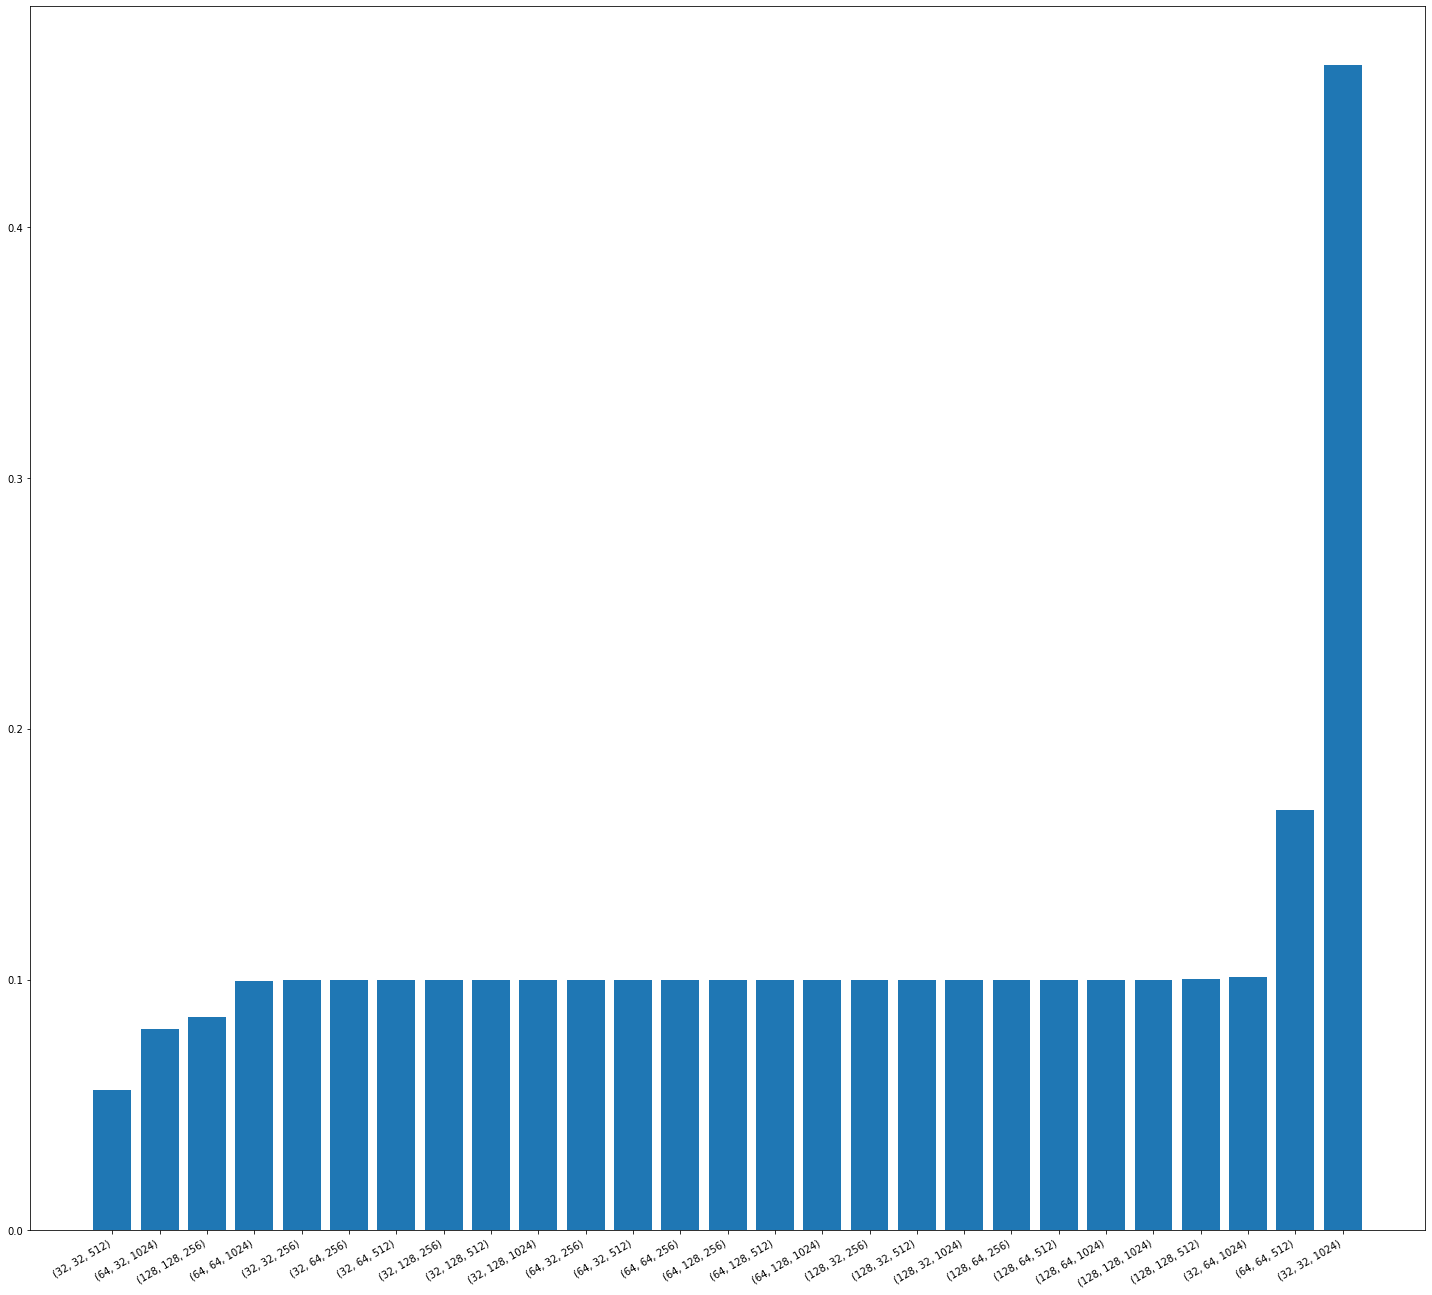

In [57]:
plotvar3 = sorted(unitdict.items(),key=lambda x: (x[1],x[0]))
plt.bar([str(x[0]) for x in plotvar3],[x[1] for x in plotvar3])
f = plt.gcf()
f.set_size_inches(25,25)
f.autofmt_xdate()

# Re-Do Handwritten model with finetuned parameters

In [79]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [80]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL

model = models.Sequential()
model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='selu', input_shape=(28,28)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='elu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='elu'))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Dropout(0.50))
model.add(layers.Dense(10))


In [81]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=15, 
                    validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4122 - accuracy: 0.8539 - val_loss: 0.3480 - val_accuracy: 0.8776
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3053 - accuracy: 0.8920 - val_loss: 0.3570 - val_accuracy: 0.8717
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2767 - accuracy: 0.9010 - val_loss: 0.2941 - val_accuracy: 0.8977
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2527 - accuracy: 0.9097 - val_loss: 0.3332 - val_accuracy: 0.8876
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2411 - accuracy: 0.9133 - val_loss: 0.3371 - val_accuracy: 0.8851
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2307 - accuracy: 0.9170 - val_loss: 0.3124 - val_accuracy: 0.8973
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2196 - accuracy: 0.9212 - val_loss: 0.2962 - val_accuracy:

313/313 - 1s - loss: 0.5852 - accuracy: 0.9232


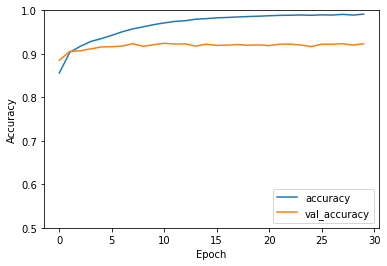

In [78]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

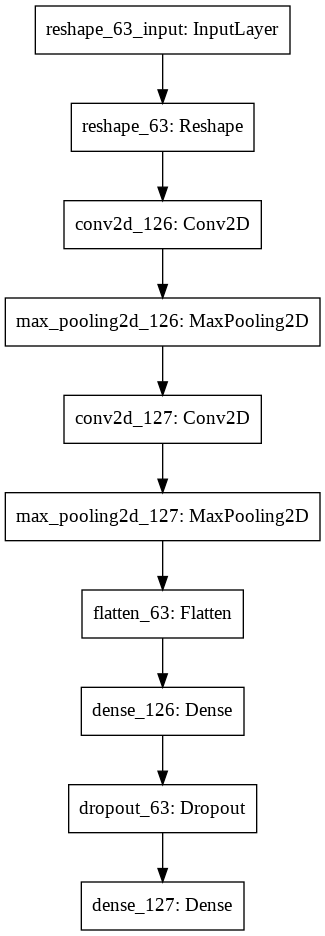

In [62]:
keras.utils.plot_model(model)

# END